# Power measure with E4418B

In [108]:
import serial
import import_ipynb
import time
import pyvisa
import sys
from decimal import Decimal
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import clear_output
from datetime import datetime

#locals
import STM32_HCI

# Specify script parameters :

In [ ]:
###############################
##Specify SA GPIB address######
powerMeter = "GPIB0::1::INSTR"
###############################

In [110]:
###############################
##Specify device COMPort#######
STM32ComPort = "COM8"
###############################

# Prepare peripherals :

In [ ]:
rm = pyvisa.ResourceManager()

rm.list_resources()

inst = rm.open_resource(powerMeter)
inst.timeout = 20000

#print(inst.query("*IDN?"))

In [111]:
serialPort = serial.Serial(port = STM32ComPort, baudrate = 115200, timeout = 3)

# Main function :

In [112]:
#logging table
df = pd.DataFrame(columns=range(2), index=range(40))

frequencies = range(2402, 2482, 2)
df[0] = frequencies

STM32_HCI.StopTone(serialPort)
STM32_HCI.StopRxTx(serialPort)

STM32_HCI.SetTxPower(serialPort, 6)

for i in range(40):
    STM32_HCI.StartTone(serialPort,i)
    time.sleep(1)
    df.loc[i, 1] = float(inst.query("FETC?").strip('\n'))
    STM32_HCI.StopTone(serialPort)
    

df = df.set_index(0)
serialPort.close()

In [ ]:
serialPort.close()

In [113]:
df.to_csv("PM_6dBm.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


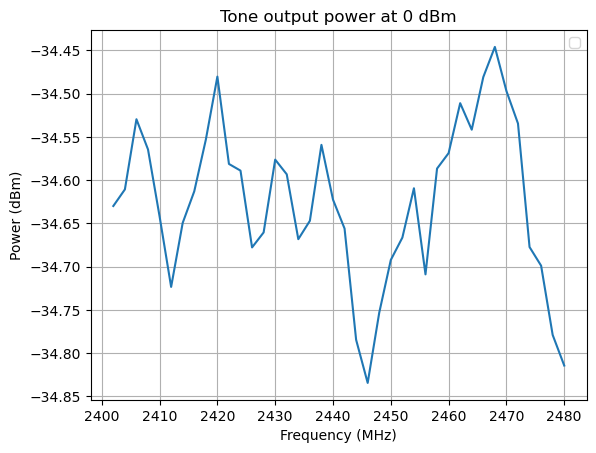

In [114]:
plt.plot(df.index, df[1])
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dBm)')
plt.title('Tone output power at 0 dBm')
plt.legend()
plt.grid(True)
plt.legend([])
plt.show()